In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop('price', axis=1).values
y = df.loc[:,['price']].values

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [60]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [61]:
print("Intercept:\n", model.intercept_, "\n")
print("Coefficient Values:\n", model.coef_[0])

Intercept:
 [-2278702.14904547] 

Coefficient Values:
 [  -33.80914554 -1721.02501098   -39.96352172   272.10204943
 -1085.33344434  4487.51810936  1145.2506681   8462.04541339]


## 1.5 Use the test data to make predictions

In [0]:
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [63]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 20338.843481632102
R^2 is 0.30479352255023606


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

In average, 1 unit increase in year (while other independent variables remain unchanged) will increase price by 1145.2506681

## 1.8 How should we interpret the Root-Mean-Square Error?

Root Mean-Square Error tells us how far from the regression line our data points are (using the standard deviation of the residuals as a measure). In this case our RMSE is 20338.84. 

Do we know if our data points are far or close to the regression line now? We don't quite know yet. We'll need to adjust our data more to compare, but also our R^2 is an indicator.

## 1.9 How should we interpret the $R^2$?

R^2 tells us the percentage of variation in y as explained by our x variables. In this case about 30% of the variation in y can be explain by our X. Not so good as of now.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [64]:
df['ln_price'] = np.log(df['price'])
df['ln_price'].head()

0     9.648595
1     9.928180
2    10.463103
3     9.786954
4     9.717158
Name: ln_price, dtype: float64

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

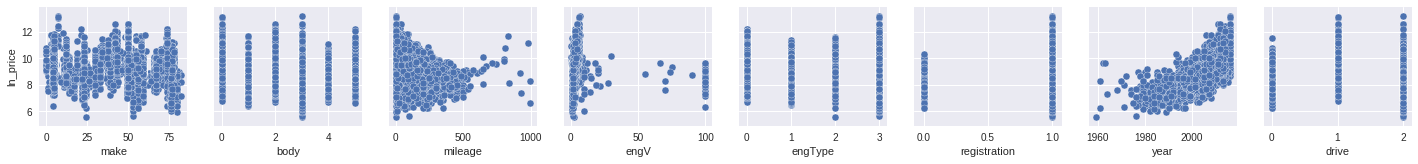

In [65]:
X_columns = df.columns.drop(['price', 'ln_price'])

# Only plotting x variables with our y variable ('ln_price')
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=X_columns)
y = df.loc[:,['price']].values

## 2.3 If appropriate, create any polynomial features. 

The only feature that may be worth turning into a polynomial is _year_, but as seen in the scatter plot above is not too curved. A line can still pass through pretty much the middle of all the points.

Let's try squaring this feature just in case and find out if it's worth including as a polynomial in our dataset.

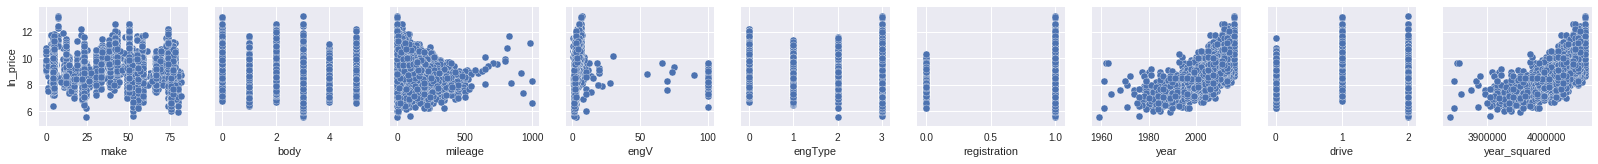

In [66]:
df['year_squared'] = df['year']**2

X_columns = df.columns.drop(['price', 'ln_price'])

sns.pairplot(data=df, y_vars=['ln_price'], x_vars=X_columns)

**Comparing _year_ and *year_squared* does not show much of a difference.** 

**We will not include the polynomial feature *year_squared* in our model. We will just stay with the _year_ feature as is.**

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [69]:
X = df.drop(['price', 'ln_price', 'year_squared'], axis=1).values
y = df.loc[:,['ln_price']].values

# Split into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print("Intercept:\n", model.intercept_, '\n')
print("Coefficient Values:\n", model.coef_[0], '\n')

print('RMSE:\n{}'.format(RMSE), '\n')
print('R^2:\n {}'.format(R2))

Intercept:
 [-182.91291832] 

Coefficient Values:
 [-1.42684975e-03 -8.99145087e-02 -2.56942168e-05  8.84992952e-03
 -5.85053907e-02  7.30108429e-01  9.54543580e-02  3.95622311e-01] 

RMSE:
0.5788740609262727 

R^2:
 0.6447468333440131


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

In average, 1 unit increase in year (while other independent variables remain unchanged) will increase the vehicle's price by about 9.55%.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent *seeks to minimize the cost function*. Gradient Descent tries different values for coefficients, evaluates their cost and then selects new coefficients that have a lower cost. 

This process is repeated until we're lead to the lowest point where the coefficents that result in the minimum cost are know.

## 3.2 What is the "Learning Rate" and what is its function?

The "Learning Rate" in Gradient Descent is the *SIZE of the steps* taken in each iteration while we seek to reach the minimum (the lowest point) of our function.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [50]:
# Running log-linear regression with same X and y as in problem 2.4
# Pretty much recalculating the previous regression using Statsmodels & Robust Standard Errors
X = df.drop(['price', 'ln_price', 'year_squared'], axis=1)
X = sm.add_constant(X)

# "HC3" makes our model use robust standard errors to account for and correct Heteroskedasticity
model = sm.OLS(y, X).fit(cov_type='HC3') 
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:25:58   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      3.453    -52.653   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [51]:
print('Variance Inflation Factors:\n')

vif = [print(f'{X.columns[i]:18}---> { variance_inflation_factor(X.values, i):7.2}\n') for i in range(X.shape[1])]
#print(vif)

Variance Inflation Factors:

const             ---> 1.2e+05

make              --->     1.1

body              --->     1.2

mileage           --->     1.5

engV              --->     1.0

engType           --->     1.1

registration      --->     1.1

year              --->     1.5

drive             --->     1.1



In [54]:
# Correlation Matrix
X = df.drop(['price', 'ln_price', 'year_squared'], axis=1)
X.corr()

,make,body,mileage,engV,engType,registration,year,drive
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000


All of our features have low VIF ratios (all around 1) and the correlation matrix only shows low ratios of correlation between our independent variables. 

Since VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis, this proves that **we don't have any multicollinearity issues**.

The rule of thumb is that any variable that has a VIF > 10 needs to be either adjusted or dropped from the model. Finding a VIF greater than 10 indicates that two independent variables are highly correlated.

This now helps to prove our cases of refraining to include polynomial features (as explained in problems 2.3 and 2.4). 

**Let's see how our regression might have looked if we would have engineer a new *year_squared* feature...**

In [52]:
X = df.drop(['price', 'ln_price'], axis=1)
X = sm.add_constant(X)

# "HC3" makes our model use robust standard errors to account for and correct Heteroskedasticity
model = sm.OLS(y, X).fit(cov_type='HC3') 
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:26:19   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

In [53]:
print('Variance Inflation Factors:\n')

vif = [print(f'{X.columns[i]:18}---> { variance_inflation_factor(X.values, i):7.2}\n') for i in range(X.shape[1])]
#print(vif)

Variance Inflation Factors:

const             --->   3e+09

make              --->     1.1

body              --->     1.2

mileage           --->     1.9

engV              --->     1.0

engType           --->     1.2

registration      --->     1.1

year              ---> 1.4e+05

drive             --->     1.1

year_squared      ---> 1.4e+05



In [55]:
# Correlation Matrix
X = df.drop(['price', 'ln_price'], axis=1)
X.corr()

,make,body,mileage,engV,engType,registration,year,drive,year_squared
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.013833,-0.196444,-0.013679
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.154554,-0.162235,-0.154919
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,-0.503135,0.067962,-0.504345
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,-0.041076,0.084756,-0.041024
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.040471,-0.044859,-0.040323
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,0.185104,-0.055793,0.185613
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,1.000000,-0.169709,0.999995
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,-0.169709,1.000000,-0.169444
year_squared,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,0.999995,-0.169444,1.000000


Looking at the VIFs and correlation matrix right above, it's obvious that **including a polinomial feature, *year_squared* greatly increases our multicollinearity ratio for both year and year_square**.